Attention Maps Visualization
==========

Simple visualization of ResNet-152/34/18 attention maps

In [19]:
from PIL import Image
import requests
import numpy as np
from io import BytesIO
import torch
from torch import nn
from torchvision.models import resnet34, resnet18, resnet152
from torchvision.models.resnet import ResNet, BasicBlock, Bottleneck
import torchvision.transforms as T
import torch.nn.functional as F
from torch.nn import KLDivLoss
import matplotlib.pyplot as plt
%matplotlib inline

Will use basic ResNet-34 from torch model zoo:

In [3]:
base_resnet34 = resnet34(pretrained=True)

/Users/colinpannikkat/Documents/schoolwork/junior/winter25/AI535/env/lib/python3.13/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/colinpannikkat/Documents/schoolwork/junior/winter25/AI535/env/lib/python3.13/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [4]:
base_resnet18 = resnet18(pretrained=True)

/Users/colinpannikkat/Documents/schoolwork/junior/winter25/AI535/env/lib/python3.13/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [5]:
class ResNet152AT(ResNet):
    """Attention maps of ResNet-152.
    
    Overloaded ResNet model to return attention maps.
    """
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        g0 = self.layer1(x)
        g1 = self.layer2(g0)
        g2 = self.layer3(g1)
        g3 = self.layer4(g2)

        x = self.avgpool(g3)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        
        return [g.pow(2).sum(dim=1) for g in (g0, g1, g2, g3)], x
    
base_resnet152 = resnet152(pretrained=True)  # Assuming resnet152 is similar to resnet34
model_resnet152 = ResNet152AT(Bottleneck, [3, 8, 36, 3])
model_resnet152.load_state_dict(base_resnet152.state_dict())

/Users/colinpannikkat/Documents/schoolwork/junior/winter25/AI535/env/lib/python3.13/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


<All keys matched successfully>

In [6]:
class ResNet34AT(ResNet):
    """Attention maps of ResNet-34.
    
    Overloaded ResNet model to return attention maps.
    """
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        g0 = self.layer1(x)
        g1 = self.layer2(g0)
        g2 = self.layer3(g1)
        g3 = self.layer4(g2)

        x = self.avgpool(g3)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        
        return [g.pow(2).sum(dim=1) for g in (g0, g1, g2, g3)], x
    
model_resnet34 = ResNet34AT(BasicBlock, [3, 4, 6, 3])
model_resnet34.load_state_dict(base_resnet34.state_dict())

<All keys matched successfully>

In [7]:
class ResNet18AT(ResNet):
    """Attention maps of ResNet-18.
    
    Overloaded ResNet model to return attention maps.
    """
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        g0 = self.layer1(x)
        g1 = self.layer2(g0)
        g2 = self.layer3(g1)
        g3 = self.layer4(g2)

        x = self.avgpool(g3)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        
        return [g.pow(2).sum(dim=1) for g in (g0, g1, g2, g3)], x
    
model_resnet18 = ResNet18AT(BasicBlock, [2, 2, 2, 2])
model_resnet18.load_state_dict(base_resnet18.state_dict())

<All keys matched successfully>

Load an image:

In [8]:
def load(url):
    response = requests.get(url)
    return np.ascontiguousarray(Image.open(BytesIO(response.content)), dtype=np.uint8)

# im = load('https://hips.hearstapps.com/hmg-prod/images/dog-puppy-on-garden-royalty-free-image-1586966191.jpg?crop=0.752xw:1.00xh;0.175xw,0&resize=1200:*')
im = load('https://forthbikes.com/wp-content/uploads/2022/10/FORTH-PARK-16-true-blue-01.jpg')

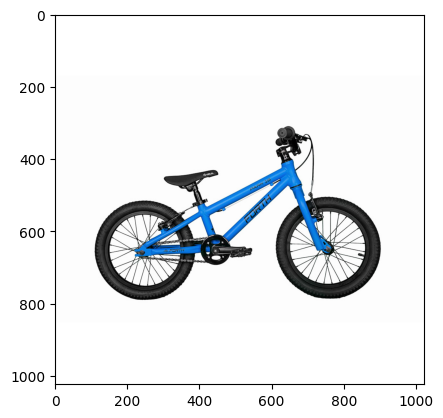

In [9]:
plt.imshow(im);

In [10]:
tr_center_crop = T.Compose([
        T.ToPILImage(),
        T.Resize(256),
        T.ToTensor(),
        T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

Visualize attention maps for each group:

L2 Loss:  tensor(0.3346)
KL Divergence Loss for group 0: 1.0970878065563738e-05
torch.Size([1, 64, 64])
torch.Size([1, 64, 64])


/var/folders/7j/q2dhdjfx5g101s145schqgrm0000gn/T/ipykernel_71137/3636942356.py:11: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  cross_entropy_loss = F.cross_entropy(F.softmax(y1), F.softmax(y2))
/var/folders/7j/q2dhdjfx5g101s145schqgrm0000gn/T/ipykernel_71137/3636942356.py:29: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  g_resnet18 = F.log_softmax(g_resnet18)
/var/folders/7j/q2dhdjfx5g101s145schqgrm0000gn/T/ipykernel_71137/3636942356.py:30: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  g_restnet152 = F.log_softmax(g_restnet152)


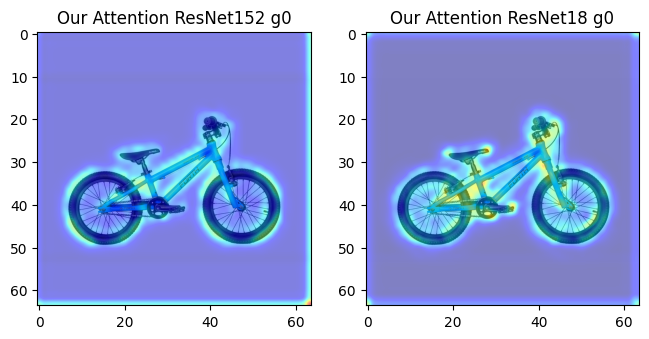

L2 Loss:  tensor(0.5754)
KL Divergence Loss for group 1: 0.0001506000990048051
torch.Size([1, 32, 32])
torch.Size([1, 32, 32])


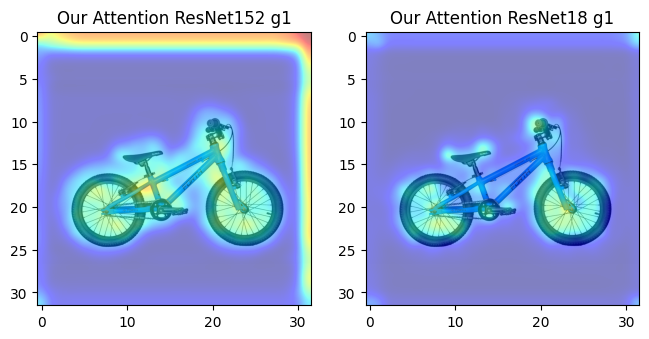

L2 Loss:  tensor(0.9358)
KL Divergence Loss for group 2: 0.0018116435967385769
torch.Size([1, 16, 16])
torch.Size([1, 16, 16])


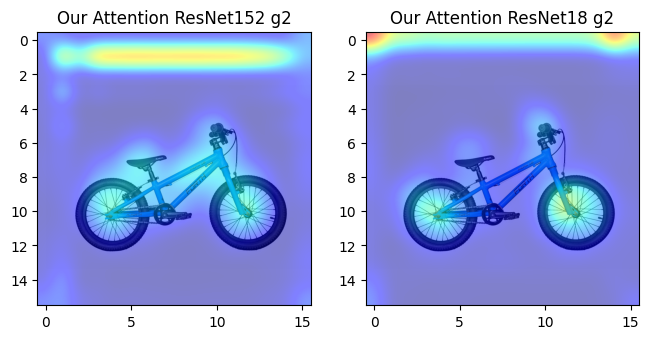

L2 Loss:  tensor(0.2289)
KL Divergence Loss for group 3: 0.00043874618131667376
torch.Size([1, 8, 8])
torch.Size([1, 8, 8])


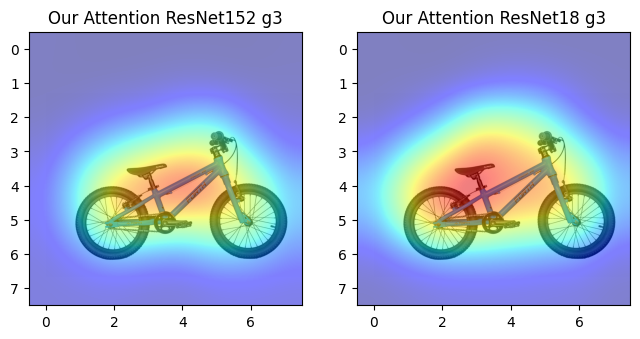

KL:  tensor(0.0024) CE:  tensor(6.6290) L2:  tensor(2.0746)


In [29]:
model_resnet152.eval()
model_resnet18.eval()

kldiv_loss = KLDivLoss(reduction="batchmean", log_target=True)

with torch.no_grad():
    x = tr_center_crop(im).unsqueeze(0)
    gs_resnet152, y1 = model_resnet152(x)
    gs_resnet18, y2 = model_resnet18(x)

cross_entropy_loss = F.cross_entropy(F.softmax(y1), F.softmax(y2))
kl_loss = 0
l2_loss = 0

for i, (g_restnet152, g_resnet18) in enumerate(zip(gs_resnet152, gs_resnet18)):
    plt.figure(figsize=(12, 6))

    og_dim = g_resnet18.shape[1]
    og_act18 = g_resnet18[0]
    og_act152 = g_restnet152[0]

    g_resnet18 = g_resnet18.reshape((1, og_dim ** 2))
    g_restnet152 = g_restnet152.reshape((1, og_dim ** 2))
    g_resnet18 = g_resnet18/torch.norm(g_resnet18, p=2)
    g_restnet152 = g_restnet152/torch.norm(g_restnet152, p=2)

    l2_loss_i = torch.norm(g_resnet18 - g_restnet152, p=2)

    g_resnet18 = F.log_softmax(g_resnet18)
    g_restnet152 = F.log_softmax(g_restnet152)
    kl_div_loss = kldiv_loss(g_resnet18, g_restnet152)

    print(f"L2 Loss: ", l2_loss_i)
    print(f'KL Divergence Loss for group {i}: {kl_div_loss.item()}')
    kl_loss += kl_div_loss
    l2_loss += l2_loss_i

    g_resnet18 = g_resnet18.reshape((1, og_dim, og_dim))
    g_restnet152 = g_restnet152.reshape((1, og_dim, og_dim))
    
    plt.subplot(1, 3, 1)
    plt.imshow(im, extent=(0, g_restnet152[0].shape[1], g_restnet152[0].shape[0], 0))
    plt.imshow(g_restnet152[0], interpolation='bicubic', alpha=0.5, cmap='jet')
    plt.title(f'Our Attention ResNet152 g{i}')
    
    plt.subplot(1, 3, 2)
    plt.imshow(im, extent=(0, g_resnet18[0].shape[1], g_resnet18[0].shape[0], 0))
    plt.imshow(g_resnet18[0], interpolation='bicubic', alpha=0.5, cmap='jet')
    plt.title(f'Our Attention ResNet18 g{i}')

    print(g_resnet18.shape)
    print(g_restnet152.shape)
    
    plt.show()

# kl_loss /= i+1

print("KL: ", kl_loss, "CE: ", cross_entropy_loss, "L2: ", l2_loss)